In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content/drive/My Drive/STAT535'

In [ ]:
cd /content/drive/MyDrive/STAT535

/content/drive/MyDrive/STAT535


In [ ]:
ls

 Admission_Predict.csv                         CPP.ipynb
'Conformal Prediction.pptx'                    Presentation_Title.docx
'Copy of Conformal Prediction Project.ipynb'   reference.gdoc
'Copy of CPP'                                 'Untitled presentation.gslides'


In [ ]:
#displaying the data

#INFO about dataset: Rows represent students with their academic profile.
#University rating is the rating from the university they belong to
#Chance of admit is their own belief of their chances to be accepted.
data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#modifying and typecasting
data = data.rename(columns={"Serial No.":"SerialNo"})
del data['SerialNo']
del data['Research']
data = data.to_numpy()
print(np.mean(data[:,0]))
print(np.mean(data[:,3]))
a0 = np.max(data[:,0])
a1 = np.max(data[:,1])
a6 = np.max(data[:,6])
for row in data:
  row[0] = int((row[0]/a0)*10)
  row[1] = int((row[1]/a1)*10)
  row[2] = int(row[2]*2)
  row[3] = int(row[3]*2)
  row[4] = int(row[4]*2)
  row[5] = int(row[5])
  row[6] = int((row[6]/a6) * 10) - 5
  if row[6] < 0:
    row[6] = 0
data = data.astype(int)
X_data = data[:,:-1]
y_data = data[:,-1]

316.472
3.374


In [ ]:
X_data

array([[ 9,  9,  8,  9,  9,  9],
       [ 9,  8,  8,  8,  9,  8],
       [ 9,  8,  6,  6,  7,  8],
       ...,
       [ 9, 10, 10,  9, 10,  9],
       [ 9,  8,  8,  8, 10,  8],
       [ 9,  9,  8,  9,  9,  9]])

In [ ]:
# data = data.rename(columns={"Serial No.":"SerialNo", "GRE Score":"GREScore", "TOEFL Score":"TOEFLScore", "University Rating":"UniversityRating","LOR ":"LOR", "Chance of Admit ":"ChanceOfAdmit"})

In [ ]:
# for col in data.columns:
#   print(col)

In [ ]:
#Modifying the data
# Deleting the unwanted column
# del data['SerialNo']

In [ ]:
# data = data.to_numpy()

In [ ]:
# data.shape

In [ ]:
# a0 = np.max(data[:,0])
# a1 = np.max(data[:,1])

In [ ]:
# data

In [ ]:
# X_data = data[:,:-1]

In [ ]:
# X_data

In [ ]:
# y_data = data[:,-1]

In [ ]:
y_data

array([4, 2, 2, 3, 1, 4, 2, 2, 0, 0, 0, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       4, 4, 5, 4, 2, 0, 0, 0, 1, 2, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 3,
       4, 4, 3, 4, 3, 3, 2, 0, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 3, 4, 4, 4, 3, 2, 2, 2, 1, 0, 0, 0, 4, 4, 4, 4, 2, 2, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 3, 4, 3, 2, 1, 1, 0, 2, 2, 3, 4, 4, 2,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 4, 4, 0, 1, 0, 1, 3, 3, 3, 4, 4, 2,
       2, 3, 4, 3, 2, 2, 3, 3, 3, 4, 4, 5, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 2, 1, 1, 0, 0, 0, 1, 2, 3, 3, 1, 1, 1, 1, 2, 4, 3, 4, 3, 3,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 4, 4, 4, 3, 3, 4, 2, 3, 2, 2,
       2, 2, 2, 2, 5, 5, 2, 0, 1, 1, 1, 2, 3, 3, 4, 4, 4, 4, 4, 3, 3, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 4, 4, 3, 3, 2, 1, 1, 1,
       2, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 4, 3, 3, 2, 3, 2, 4, 3, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 3, 4, 2, 1, 1, 2, 3, 3, 3, 4, 4,
       4, 4, 3, 3, 0, 0, 0, 1, 1, 2, 2, 3, 4, 2, 1,

In [ ]:
#Creting random data for experimenting
np.random.seed(14)
X, y = make_blobs(n_samples = 5000,
                      n_features = 2,
                      centers = 4,
                      cluster_std = 2,
                      shuffle = True)


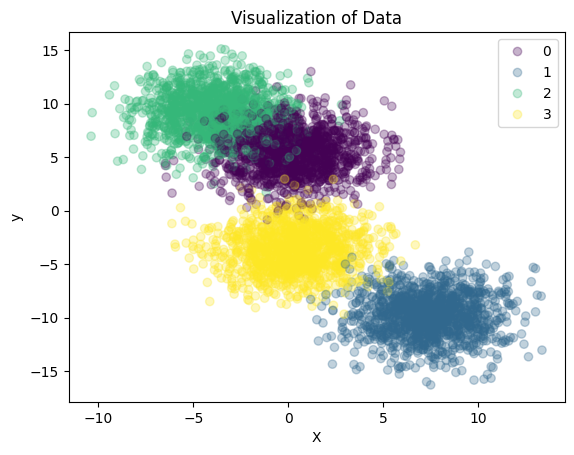

In [ ]:
#Visualizing Data
scatter = plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.title("Visualization of Data")
plt.legend(*scatter.legend_elements())
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
#Split our data into trainig, validation and testig parts
def split(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
  X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=30)

  return X_train, y_train, X_val, y_val, X_test, y_test

  #train, test, val = 0.8, 0.1, 0.1


In [ ]:
#KNN Classifier
def KNN(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  # print(y_pred[14])
  # print(accuracy)
  return knn, accuracy

In [ ]:
#Random Forest Classifier
def RandomForest(X_train, y_train, X_test, y_test):
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  # print(accuracy)
  # print(y_pred[14])
  return rf, accuracy

In [ ]:
def NeuralNetwork(X_train, y_train, X_test, y_test):
  nn = MLPClassifier(hidden_layer_sizes=(250, 400, 400, 50), max_iter=250, activation='tanh', solver='adam')
  nn.fit(X_train, y_train)
  y_pred = nn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  # print(accuracy)
  # print(y_pred[14])
  return nn, accuracy

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split(X, y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((4000, 2), (4000,), (500, 2), (500,), (500, 2), (500,))

In [ ]:
knn, knn_acc = KNN(X_train, y_train, X_val, y_val)
print("Accuracy with KNN is :", knn_acc)
rf, rf_acc = RandomForest(X_train, y_train, X_val, y_val)
print("Accuracy with Random Forest is :", rf_acc)
nn, nn_acc = NeuralNetwork(X_train, y_train, X_val, y_val)
print("Accuracy with Neural Network is :", nn_acc)

Accuracy with KNN is : 0.942
Accuracy with Random Forest is : 0.94
Accuracy with Neural Network is : 0.952


Then, the training step: Here we need to decide if we will include more:
Also, Thomas used max_depth=3 for Random forest, so maybe for our problem we can or should modify. Similar with other parameters of the other models.

Now, from what I understand, for CP, you need to set a way to measure the agreement of having an specific input data and certain label. Thomas used the in-built function that tells you the probability of the input data being X and the label being Y.

FOR our project we can change that I THINK. Anyway, this part of the pseudocode corresponds to:

In [ ]:
def nonconformity_probability(X, y):
  nc_score = []
  for i in range(len(X)):
    c = rf.predict_proba([X[i]])
    # print(c)
    k = c[0]
    # print(k)
    l = k[y[i]]
    print(l)
    nc_score.append(1-l)
  return nc_score

In [ ]:
nc = nonconformity_probability(X_val, y_val)

In [ ]:
def get_p_value(nc_list, new_nc_scores):
  p_list = []
  nc_list = np.asarray(nc_list)
  for score in new_nc_scores:
    p_list.append(len(nc_list[score>nc_list])/(len(nc_list)+1))
  return p_list

In [ ]:
def get_labels(X, label, ncs, alpha=0.05):
  predictions = []
  for datapoint in X:
    new_ncs = []
    for y_i in label:
      new_ncs.append(nonconformity_probability([datapoint], [y_i]))
    ps = get_p_value(ncs, new_ncs)
    labels = []
    for i in range(len(ps)):
      if ps[i]<1-alpha:
        labels.append(i)
    predictions.append(labels)
  return predictions

In [ ]:
prediction = get_labels(X_test, list(range(0,4)), nc)

In [ ]:
X_test[]

In [ ]:
def conformal_accuracy(prediction, y):
  correct = 0
  total = 0
  for i in range(len(y)):
    if y[i] in prediction[i]:
      correct += 1
    total += 1
    acc = correct/total
  return acc

In [ ]:
conformal_acc = conformal_accuracy(prediction, y_test)

In [ ]:
conformal_acc

0.948

In [ ]:
rf_acc

0.94

**Conformal Prediction on Admissions Data**

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split(X_data, y_data)

In [ ]:
knn, knn_acc = KNN(X_train, y_train, X_val, y_val)
print("Accuracy with KNN is :", knn_acc)
rf, rf_acc = RandomForest(X_train, y_train, X_val, y_val)
print("Accuracy with Random Forest is :", rf_acc)
nn, nn_acc = NeuralNetwork(X_train, y_train, X_val, y_val)
print("Accuracy with Neural Network is :", nn_acc)

Accuracy with KNN is : 0.62
Accuracy with Random Forest is : 0.68
Accuracy with Neural Network is : 0.68


In [ ]:
nc = nonconformity_probability(X_val, y_val)

In [ ]:
prediction = get_labels(X_test, list(range(0,6)), nc)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
prediction

In [ ]:
conformal_acc = conformal_accuracy(prediction, y_test)

In [ ]:
conformal_acc

0.96